In [ ]:
%cd /content/drive/MyDrive/L-forms/


/content/drive/MyDrive/L-forms


In [ ]:
train_x = "/content/drive/MyDrive/L-forms/1/"
train_y = "/content/drive/MyDrive/L-forms/from_python/"

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from albumentations import CenterCrop, RandomRotate90, GridDistortion, HorizontalFlip, VerticalFlip, Transpose, OpticalDistortion


In [ ]:
# data augmentation part; image preparation
def ImagPrep(path_x, path_y):
    # return array of images
    Width = 256; Height = 256; i=0

    images_x = os.listdir(path_x)
    images_y = os.listdir(path_y)
    x = []; y = [];
    X1 = []; X2 = []; X3 = []; X4 = []; X5 = []; X6 = []; X7 = [];
    Y1 = []; Y2 = []; Y3 = []; Y4 = []; Y5 = []; Y6 = []; Y7 = []; 

    
    for i in range(len(images_x)):
        y_array = cv2.imread(os.path.join(path_y,images_y[i]), 0)
        x_array = cv2.imread(os.path.join(path_x,images_x[i]), 1)
        

        
        aug = CenterCrop(Height, Width, p = 1.0)
        augmented = aug(image = x_array, mask = y_array)
        x1 = augmented['image']; y1 = augmented['mask']
        X1.append(x1); Y1.append(y1)
        
        aug = RandomRotate90(p=1.0)
        augmented = aug(image=x_array, mask=y_array)
        x2 = augmented['image']; y2 = augmented['mask']
        x2 = cv2.resize(x2, (Width, Height))
        y2 = cv2.resize(y2, (Width, Height))
        X2.append(x2); Y2.append(y2)

        aug = GridDistortion(p=1.0)
        augmented = aug(image=x_array, mask=y_array)
        x3 = augmented['image']; y3 = augmented['mask']
        x3 = cv2.resize(x3, (Width, Height))
        y3 = cv2.resize(y3, (Width, Height))
        X3.append(x3); Y3.append(y3)

        aug = HorizontalFlip(p=1.0)
        augmented = aug(image=x_array, mask=y_array)
        x4 = augmented['image']; y4 = augmented['mask']
        x4 = cv2.resize(x4, (Width, Height))
        y4 = cv2.resize(y4, (Width, Height))
        X4.append(x4); Y4.append(y4)

        aug = VerticalFlip(p=1.0)
        augmented = aug(image=x_array, mask=y_array)
        x5 = augmented['image']; y5 = augmented['mask']
        x5 = cv2.resize(x5, (Width, Height))
        y5 = cv2.resize(y5, (Width, Height))
        X5.append(x5); Y5.append(y5)
        
        aug = Transpose(p=1.0)
        augmented = aug(image=x_array, mask=y_array)
        x6 = augmented['image']; y6 = augmented['mask']
        x6 = cv2.resize(x6, (Width, Height))
        y6 = cv2.resize(y6, (Width, Height))
        X6.append(x6); Y6.append(y6)
        
        aug = OpticalDistortion(p=1.0)
        augmented = aug(image=x_array, mask=y_array)
        x7 = augmented['image']; y7 = augmented['mask']
        x7 = cv2.resize(x7, (Width, Height))
        y7 = cv2.resize(y7, (Width, Height))
        X7.append(x7); Y7.append(y7)
        

            
    X = X1 + X2 + X3 + X4 + X5 + X6 + X7 
    Y = Y1 + Y2 + Y3 + Y4 + Y5 + Y6 + Y7
    
    X = np.array(X)
    Y = np.array(Y, dtype  = bool)    

    return X, Y

In [ ]:
[X, Y] = ImagPrep(train_x, train_y)

In [ ]:
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, concatenate, Conv2DTranspose
import tensorflow as tf
init = tf.keras.initializers.he_normal()

width = 256; height = 256; channel = 3
inputs = tf.keras.layers.Input((height, width, channel))
data = tf.keras.layers.Lambda(lambda x: x/255)(inputs)

#Unet model
## Contraction
c1 = Conv2D(16, (3,3), activation = "relu", kernel_initializer = init, padding = 'same')(data)
c1 = Dropout(0.1)(c1)
c1 = Conv2D(16, (3,3), activation = 'relu', kernel_initializer = init, padding = 'same')(c1)
p1 = MaxPooling2D((2,2))(c1)

c2 = Conv2D(32, (3,3), activation='relu', kernel_initializer = init, padding = 'same')(p1)
c2 = Dropout(0.1)(c2)
c2 = Conv2D(32, (3,3), activation='relu', kernel_initializer= init, padding = 'same')(c2)
p2 = MaxPooling2D((2,2))(c2)

c3 = Conv2D(64, (3,3), activation='relu', kernel_initializer = init, padding = 'same')(p2)
c3 = Dropout(0.2)(c3)
c3 = Conv2D(64, (3,3), activation='relu', kernel_initializer= init, padding = 'same')(c3)
p3 = MaxPooling2D((2,2))(c3)

c4 = Conv2D(128, (3,3), activation='relu', kernel_initializer = init, padding = 'same')(p3)
c4 = Dropout(0.2)(c4)
c4 =  Conv2D(128, (3,3), activation='relu', kernel_initializer = init, padding = 'same')(c4)
p4 = MaxPooling2D((2,2))(c4)

c5 = Conv2D(256, (3,3), activation='relu', kernel_initializer = init, padding = 'same')(p4)
c5 = Dropout(0.3)(c5)
c5 =  Conv2D(256, (3,3), activation='relu', kernel_initializer = init, padding = 'same')(c5)


## Expansion
u6 = Conv2DTranspose(128, (2,2), strides = (2,2), padding = 'same')(c5)
u6 = concatenate([u6,c4])
c6 = Conv2D(128, (3,3), activation='relu', kernel_initializer = init, padding = 'same')(u6)
c6 = Dropout(0.2)(c6)
c6 =  Conv2D(128, (3,3), activation='relu', kernel_initializer = init, padding = 'same')(c6)

u7 = Conv2DTranspose(64, (2,2), strides = (2,2), padding = 'same')(c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3,3), activation='relu', kernel_initializer = init, padding = 'same')(u7)
c7 = Dropout(0.2)(c7)
c7 =  Conv2D(64, (3,3), activation='relu', kernel_initializer = init, padding = 'same')(c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer=init, padding='same')(u8)
c8 = Dropout(0.1)(c8)
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer=init, padding='same')(c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer=init, padding='same')(u9)
c9 = Dropout(0.1)(c9)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer=init, padding='same')(c9)


outputs = Conv2D(1, (1,1), activation = 'sigmoid')(c9)
unet_model = tf.keras.Model(inputs = [inputs], outputs = [outputs])
unet_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
unet_model.summary()

#####
#Checkpoint
checkpoint = tf.keras.callbacks.ModelCheckpoint('L1_forms.segmentation', verbose=1, save_best_only=True)
callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=6, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]
results = unet_model.fit(X, Y, validation_split=0.15, batch_size=11, epochs=35, callbacks = callbacks)


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 256, 256, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 256, 256, 16) 448         lambda_1[0][0]                   
__________________________________________________________________________________________________
dropout_9 (Dropout)             (None, 256, 256, 16) 0           conv2d_19[0][0]                  
____________________________________________________________________________________________

In [ ]:
X.shape

(791, 256, 256, 3)

In [ ]:
def Imag(path,s):
    # return array of images

    imagesList = os.listdir(path)
    loadedImages = []
    for image in imagesList:
        imag_array = cv2.imread(os.path.join(path,image), s)
        size = 256
        resized_image = cv2.resize(imag_array, (size,size))

        loadedImages.append(resized_image)
    
    loadedImages = np.array(loadedImages)
    return loadedImages


In [ ]:
data_x = Imag(train_x, 1)
data_y = Imag(train_y,0)

In [ ]:
preds = unet_model.predict(data_x, verbose = 1)



4/4 [==============================] - 2s 215ms/step


In [ ]:
predicted1 = (preds>0.5).astype(int)
predicted1 = predicted1[:,:,:,0]

predicted2 = (preds * 255).astype(int)
predicted2 = predicted2[:,:,:,0]

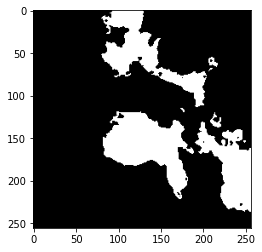

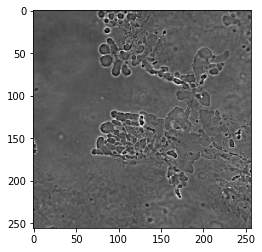

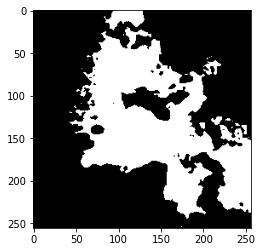

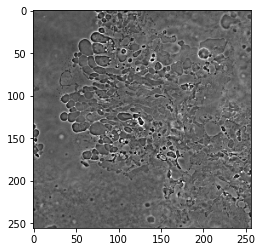

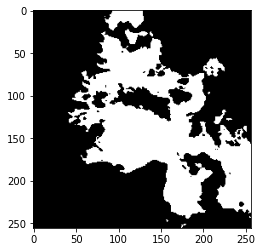

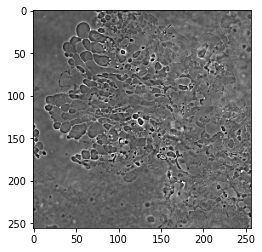

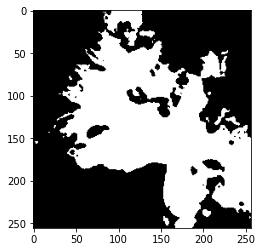

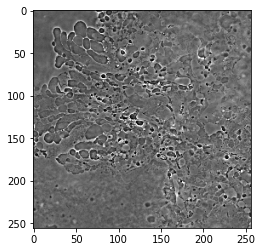

In [ ]:
  plt.imshow(predicted1[7], cmap = 'gray')
  plt.show()
  plt.imshow(data_x[7], cmap = 'gray')
  plt.show()
  plt.imshow(predicted1[47], cmap = 'gray')
  plt.show()
  plt.imshow(data_x[47], cmap = 'gray')
  plt.show()
  plt.imshow(predicted1[77], cmap = 'gray')
  plt.show()
  plt.imshow(data_x[77], cmap = 'gray')
  plt.show()
  plt.imshow(predicted1[97], cmap = 'gray')
  plt.show()
  plt.imshow(data_x[97], cmap = 'gray')
  plt.show()
 
 